# Assignment - 1
Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. 
Perform following tasks: 1. Pre-process the dataset. 2. Identify outliers. 3. Check the correlation. 
4.Implement linear regression, logistic regression, lasso regression, ridge regression, polynomial regression,
Bayesian linear regression, principal components regression. quartile regression,random forest regression models.  
partial least square regression, elastic net regression, Poisson regression  Evaluate the models and compare their
respective scores like R2, RMSE, etc

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error 
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import randomfor

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<AxesSubplot: >

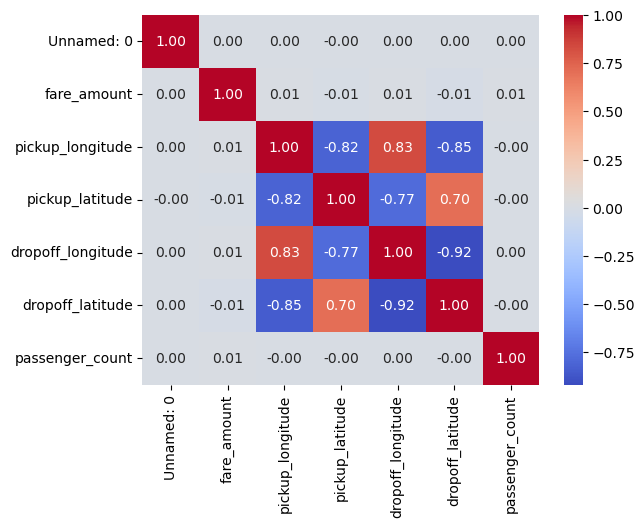

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# sns.heatmap?

In [9]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.drop(columns=['Unnamed: 0','key','pickup_datetime'],inplace=True)

[]

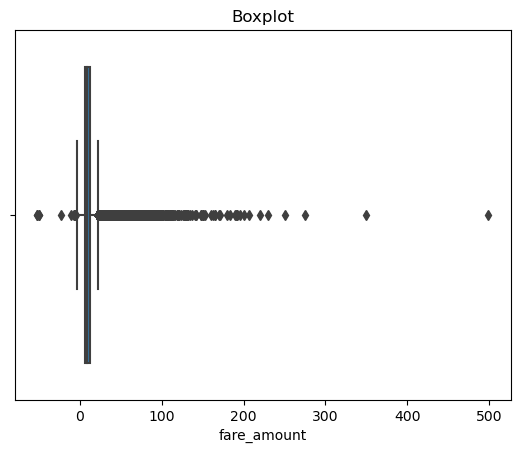

In [11]:
sns.boxplot(x=df["fare_amount"])
plt.title("Boxplot")
plt.plot()

In [12]:
low=df["fare_amount"].quantile(0.05)
high=df["fare_amount"].quantile(0.94)
df=df[(df["fare_amount"]>low)&(df["fare_amount"]<high)]

[]

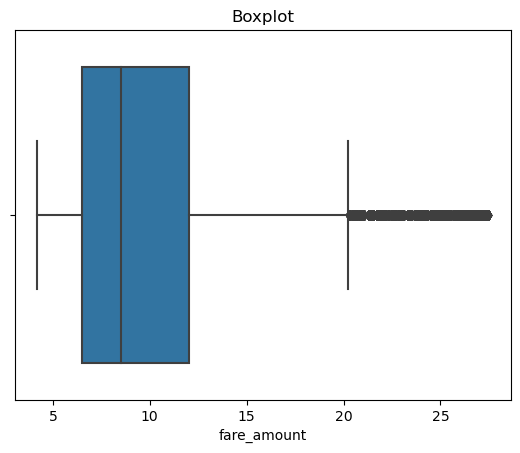

In [13]:
sns.boxplot(x=df["fare_amount"])
plt.title("Boxplot")
plt.plot()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174490 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        174490 non-null  float64
 1   pickup_longitude   174490 non-null  float64
 2   pickup_latitude    174490 non-null  float64
 3   dropoff_longitude  174490 non-null  float64
 4   dropoff_latitude   174490 non-null  float64
 5   passenger_count    174490 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 9.3 MB


In [15]:
y = df['fare_amount']
X = df.drop(columns=['fare_amount'])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)
y_pred = lin_mod.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
r2_error = r2_score(y_test,y_pred)
print('The RMSE for the given model is:- ',error)
print('The r2 error for the given model is:- ',r2_error)

The RMSE for the given model is:-  4.742351760679009
The r2 error for the given model is:-  0.00015893093927277224


In [18]:
l_mod = Lasso()
l_mod.fit(X_train,y_train)
y_pred = l_mod.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
r2_error = r2_score(y_test,y_pred)
print('The RMSE for the given model is:- ',error)
print('The r2 error for the given model is:- ',r2_error)

The RMSE for the given model is:-  4.742748532283052
The r2 error for the given model is:-  -8.380622671610993e-06


In [19]:
r_mod = Ridge()
r_mod.fit(X_train,y_train)
y_pred = r_mod.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
r2_error = r2_score(y_test,y_pred)
print('The RMSE for the given model is:- ',error)
print('The r2 error for the given model is:- ',r2_error)

The RMSE for the given model is:-  4.7423517610421895
The r2 error for the given model is:-  0.00015893078613238298


In [20]:
for_mod = RandomForestRegressor(n_estimators=100,random_state=100)
for_mod.fit(X_train,y_train)
y_pred = for_mod.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
r2_error = r2_score(y_test,y_pred)
print('The RMSE for the given model is:- ',error)
print('The r2 error for the given model is:- ',r2_error)

The RMSE for the given model is:-  2.530154447753573
The r2 error for the given model is:-  0.7153982880740757


In [21]:
# X_train_poly.shape

In [22]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin2 = LinearRegression()
lin2.fit(X_train_poly, y_train)
y_pred = lin2.predict(X_test_poly)
error = np.sqrt(mean_squared_error(y_test,y_pred))
r2_error = r2_score(y_test,y_pred)
print('The RMSE for the given model is:- ',error)
print('The r2 error for the given model is:- ',r2_error)

The RMSE for the given model is:-  7.055850132582224
The r2 error for the given model is:-  -1.21330945099391


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lin3 = LinearRegression()
lin3.fit(X_train_pca, y_train)
y_pred = lin3.predict(X_test_pca)
error = np.sqrt(mean_squared_error(y_test,y_pred))
r2_error = r2_score(y_test,y_pred)
print('The RMSE for the given model is:- ',error)
print('The r2 error for the given model is:- ',r2_error)

The RMSE for the given model is:-  4.742707156147866
The r2 error for the given model is:-  9.067614853863759e-06


In [24]:
from sklearn.linear_model import ElasticNet
e_mod = ElasticNet()
e_mod.fit(X_train,y_train)
y_pred = e_mod.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
r2_error = r2_score(y_test,y_pred)
print('The RMSE for the given model is:- ',error)
print('The r2 error for the given model is:- ',r2_error)

The RMSE for the given model is:-  4.742748532283052
The r2 error for the given model is:-  -8.380622671610993e-06


In [25]:
from sklearn.cross_decomposition import PLSRegression
mod = PLSRegression(n_components=3)
mod.fit(X_train,y_train)
y_pred = mod.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
r2_error = r2_score(y_test,y_pred)
print('The RMSE for the given model is:- ',error)
print('The r2 error for the given model is:- ',r2_error)

The RMSE for the given model is:-  4.742415541545363
The r2 error for the given model is:-  0.00013203662115734982


In [26]:
# r_mod = LogisticRegression()
# r_mod.fit(X_train,y_train)
# y_pred = r_mod.predict(X_test)
# error = np.sqrt(mean_squared_error(y_test,y_pred))
# r2_error = r2_score(y_test,y_pred)
# print('The RMSE for the given model is:- ',error)
# print('The r2 error for the given model is:- ',r2_error)

In [27]:
import statsmodels.api as sm
quantiles = [0.25, 0.5, 0.75]  # Define the quantiles you want to estimate
results = []

for quantile in quantiles:
    model = sm.QuantReg(y, X)
    result = model.fit(q=quantile)
    results.append(result)
    
for i, quantile in enumerate(quantiles):
    print(f"Quantile {quantile} Regression Results:")
    print(results[i].summary())
    print("\n")

Quantile 0.25 Regression Results:
                         QuantReg Regression Results                          
Dep. Variable:            fare_amount   Pseudo R-squared:             -0.02319
Model:                       QuantReg   Bandwidth:                      0.3279
Method:                 Least Squares   Sparsity:                        8.177
Date:                Sun, 19 Nov 2023   No. Observations:               174490
Time:                        10:51:15   Df Residuals:                   174485
                                        Df Model:                            5
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude     -0.1129      0.003    -44.337      0.000      -0.118      -0.108
pickup_latitude      -0.1656      0.002    -82.308      0.000      -0.170      -0.162
dropoff_longitude    -0.0506      0.003    -19.734      0.000      -0

In [28]:
model = sm.GLM(y, X, family=sm.families.Poisson())
result = model.fit()
print(result.summary())


C:\Users\01abn\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\01abn\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\01abn\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\01abn\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\01abn\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.

In [ ]:
import pymc3 as pm
with pm.Model() as model:
    # Define the priors for the model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # Define the likelihood (i.e., the model)
    y_est = alpha + beta * X
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
with model:
    trace = pm.sample(2000, tune=1000, cores=1, random_seed=0)  # Adjust the number of samples and burn-in as needed
pm.traceplot(trace)
plt.show()


In [ ]:
# pip install pymc3
